# Stunting Classification Model


## Install Dependencies

In [3]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Import Library

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Load the Training and Test Sets

In [3]:
# Ganti sesuai lokasi dataset
folderName = "StuntingClassificationDataset"
trainFileName = "train.csv"
testFileName = "test.csv"

train_path = os.path.join(os.getcwd(), 'data', folderName, trainFileName)
train = pd.read_csv(train_path, header=0)

test_path = os.path.join(os.getcwd(), 'data', folderName, testFileName)
test = pd.read_csv(test_path, header=0)

print(train.head())
print(test.head())

   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm) Status Gizi
0            18     laki-laki               80.4      normal
1             7     laki-laki               81.3      tinggi
2            60     laki-laki              122.3      normal
3            18     laki-laki               81.3      normal
4            20     perempuan               76.3     stunted
   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0            26     perempuan         100.100000            tinggi
1             4     laki-laki          51.500000  severely stunted
2             0     perempuan          56.943107            tinggi
3            59     laki-laki          98.900000           stunted
4            38     laki-laki          85.300000  severely stunted


## Convert Categorical Column Into One-Hot Encoded Column

In [4]:
train['Jenis Kelamin'] = train['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
train['Status Gizi'] = train['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

test['Jenis Kelamin'] = test['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
test['Status Gizi'] = test['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

print(train.head())
print(test.head())

   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0            18              0               80.4            2
1             7              0               81.3            3
2            60              0              122.3            2
3            18              0               81.3            2
4            20              1               76.3            1
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0            26              1         100.100000            3
1             4              0          51.500000            0
2             0              1          56.943107            3
3            59              0          98.900000            1
4            38              0          85.300000            0


## Split The Dataset Into Features And Label

In [5]:
xtrain = train[['Umur (bulan)', 'Jenis Kelamin','Tinggi Badan (cm)']].values
ytrain = train['Status Gizi'].values

xtest = test[['Umur (bulan)', 'Jenis Kelamin','Tinggi Badan (cm)']].values
ytest = test['Status Gizi'].values

print(xtrain)
print(ytrain)
print(xtest)
print(ytest)

[[ 18.          0.         80.4      ]
 [  7.          0.         81.3      ]
 [ 60.          0.        122.3      ]
 ...
 [ 42.          0.        100.5      ]
 [  2.          0.         50.6715241]
 [ 21.          1.         91.8      ]]
[2 3 2 ... 2 0 2]
[[ 26.           1.         100.1       ]
 [  4.           0.          51.5       ]
 [  0.           1.          56.94310704]
 ...
 [ 55.           0.         108.        ]
 [  8.           0.          61.3       ]
 [ 53.           1.         115.2       ]]
[3 0 3 ... 2 0 2]


## Architechture Options

In [ ]:
"""
Available Layer Options (https://www.tensorflow.org/api_docs/python/tf/keras/layers)
1. Input layer: tf.keras.Input(shape=(3,)) //Untuk input, shape menyesuaikan jumlah feature
2. Dense

Available Optimizer Options (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
1. SGD (Stochastic Gradient Descent): tf.keras.optimizers.SGD() or 'sgd'
2. Adam (Adaptive Moment Estimation): tf.keras.optimizers.Adam() or 'sgd'
3. RMSprop (Root Mean Square Propagation): tf.keras.optimizers.RMSprop() or 'rmsprop'
4. Adagrad (Adaptive Gradient Algorithm): tf.keras.optimizers.Adagrad() or 'adagrad'
5. Adadelta: tf.keras.optimizers.Adadelta() or 'adadelta'
6. Nadam (Nesterov-accelerated Adaptive Moment Estimation): tf.keras.optimizers.Nadam() or 'nadam'
7. Ftrl (Follow The Regularized Leader): tf.keras.optimizers.Ftrl() or 'ftrl'
8. Adamax (A Variant of Adam): tf.keras.optimizers.Adamax() or 'adamax'

Available Losses Options ()

Available Metrics ()
"""

## Make the Model

In [11]:
optimizer = 'adam'
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = ['accuracy']

model = tf.keras.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=4, activation="softmax")
])
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132 (528.00 B)

 Trainable params: 132 (528.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [12]:
# Ganti sesuai kebutuhan
epochs = 100
batch_size = 32

history = model.fit(
    xtrain,
    ytrain,
    epochs=epochs,
    validation_data=(xtest, ytest),
    batch_size=batch_size
)

Epoch 1/100
3706/3706 ━━━━━━━━━━━━━━━━━━━━ 2s 443us/step - accuracy: 0.4983 - loss: 2.8901 - val_accuracy: 0.5847 - val_loss: 1.0075
Epoch 2/100
3706/3706 ━━━━━━━━━━━━━━━━━━━━ 2s 457us/step - accuracy: 0.5960 - loss: 0.9630 - val_accuracy: 0.6318 - val_loss: 0.8730
Epoch 3/100
3706/3706 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step - accuracy: 0.6382 - loss: 0.8553 - val_accuracy: 0.6624 - val_loss: 0.7266
Epoch 4/100
3706/3706 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - accuracy: 0.7294 - loss: 0.6993 - val_accuracy: 0.7946 - val_loss: 0.5860
Epoch 5/100
3706/3706 ━━━━━━━━━━━━━━━━━━━━ 2s 494us/step - accuracy: 0.7945 - loss: 0.5734 - val_accuracy: 0.8165 - val_loss: 0.5287
Epoch 6/100
3706/3706 ━━━━━━━━━━━━━━━━━━━━ 2s 514us/step - accuracy: 0.8255 - loss: 0.4931 - val_accuracy: 0.8289 - val_loss: 0.4533
Epoch 7/100
3706/3706 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step - accuracy: 0.8450 - loss: 0.4366 - val_accuracy: 0.8682 - val_loss: 0.3961
Epoch 8/100
3706/3706 ━━━━━━━━━━━━━━━━━━━━ 2s 452us/step - accuracy: 

## Manually Test Prediction

In [13]:
manualTest = [
    [[0, 0, 42.7434938911793],"severely stunted"],
    [[0, 0, 58.493563524626], "tinggi"],
    [[0, 0, 50.3967690206023],"normal"],
    [[21, 1, 96.3],"tinggi"],
    [[18, 0, 81.7],"normal"],
    [[36, 0, 110.1],"tinggi"],
    [[0, 0, 45.2517789938352],"stunted"],
    [[41, 0, 89.5],"stunted"],
    [[18, 1, 80.1],"normal"],
    [[10, 1, 79.6],"tinggi"],
]

for i in range(len(manualTest)):
    pred = np.array(manualTest[i][0]).reshape(1, -1)
    pred_tensor = tf.convert_to_tensor(pred, dtype=tf.float32)
    prediction = model.predict(pred_tensor, verbose=False)
    index = np.argmax(prediction)
    confidence = round(prediction[0][index] * 100, 2)
    output = ["severely stunted", "stunted", "normal", "tinggi"][index]
    if output == manualTest[i][1]:
        print(f"Testcase {i}: Passed, confidence: {confidence}%")
    else:
        print(f"Testcase {i}: Failed, expected: {manualTest[i][1]} got: {output}, confidence: {confidence}%")

Testcase 0: Passed, confidence: 99.99%
Testcase 1: Passed, confidence: 96.2%
Testcase 2: Passed, confidence: 99.12%
Testcase 3: Passed, confidence: 99.73%
Testcase 4: Passed, confidence: 99.99%
Testcase 5: Passed, confidence: 99.84%
Testcase 6: Failed, expected: stunted got: severely stunted, confidence: 95.14%
Testcase 7: Passed, confidence: 90.19%
Testcase 8: Passed, confidence: 100.0%
Testcase 9: Passed, confidence: 85.77%


## Evaluate The Model

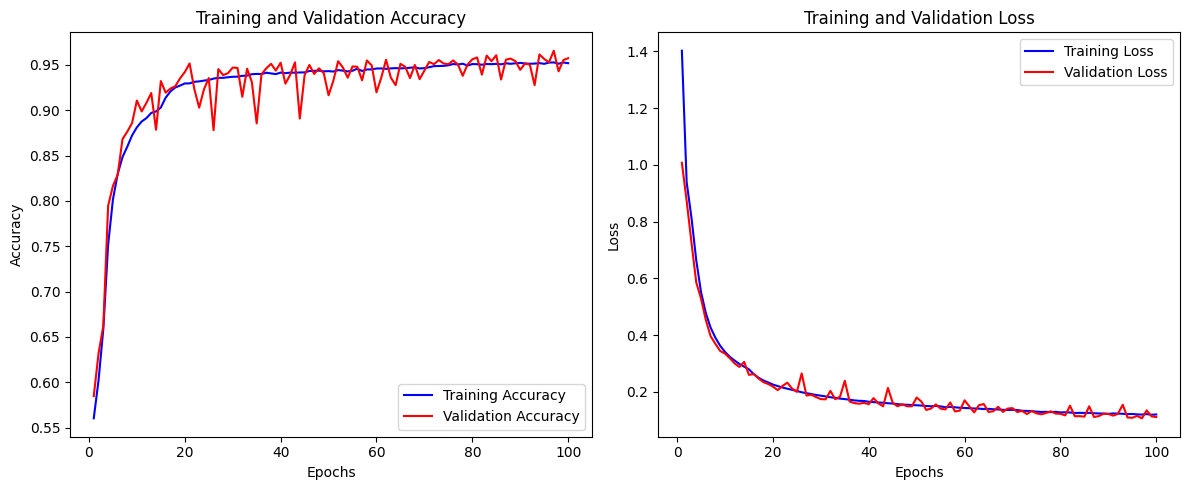

In [14]:
# Extract metrics from the history object
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Save The Model

In [15]:
fileName = "StuntingClassificationModel"
folderName = "model"
os.makedirs(os.path.join(os.getcwd(), folderName), exist_ok=True)
model.save(os.path.join(os.getcwd(), folderName, fileName + ".keras"))
